In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import scipy.stats as st
from pathlib import Path

np.random.seed(42)

data = load_diabetes(as_frame=True)
df = data.frame.copy()
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
def ci_for_mean_t(sample, alpha=0.05):
    n = len(sample)
    xbar = np.mean(sample)
    s = np.std(sample, ddof=1)
    se = s / np.sqrt(n)
    tcrit = st.t.ppf(1 - alpha/2, df= n-1)
    lo, hi = xbar - tcrit*se, xbar+tcrit*se
    return lo, hi, xbar, s, se, tcrit

n = 20
sample = df["target"].sample(n=n, replace=True, random_state=7).to_numpy()
lo, hi, xbar, s, se, tcrit = ci_for_mean_t(sample)

true_mu = df["target"].mean()
ci_summary = pd.DataFrame({
    "n": [n],
    "sample_mean": [xbar],
    "sample_sd": [s],
    "SE": [se],
    "t* (0.975, df=n-1)": [tcrit],
    "CI_low": [lo],
    "CI_high": [hi],
    "contains_true_mu?": [bool(lo <= true_mu <= hi)],
    "true_mu (from full data)": [true_mu]
})

In [3]:
ci_summary

,n,sample_mean,sample_sd,SE,"t* (0.975, df=n-1)",CI_low,CI_high,contains_true_mu?,true_mu (from full data)
0,20,158.1,59.734412,13.357021,2.093024,130.143435,186.056565,True,152.133484


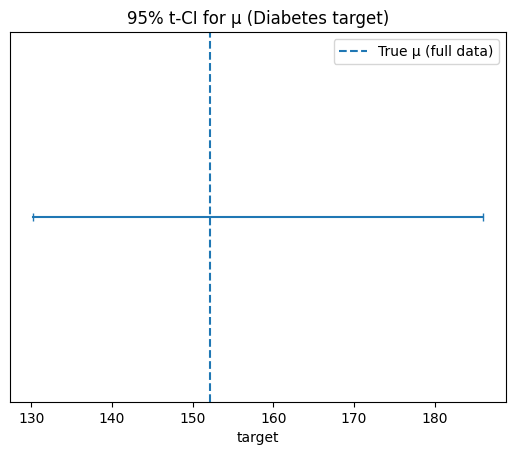

In [4]:
plt.figure()
plt.axvline(true_mu, linestyle = "--",label="True μ (full data)")
plt.plot([lo, hi], [0,0], marker="|")
plt.yticks([])
plt.legend()
plt.xlabel("target")
plt.title("95% t-CI for μ (Diabetes target)")

plt.show()

In [ ]:
uk_sales = customer_sales[df.loc[df["Country"]=="United Kingdom","CustomerID"].unique()]
stats, p= stats.shapiro(uk_sales)
print("Statistic =", stat, " p-value =", p)
if p > 0.05:
    print("정규성을 만족한다고 볼 수 있음 (귀무가설 기각 불가)")
else:
    print("정규성이 깨졌다고 볼 수 있음 (귀무가설 기각)")

plt.figure(figsize=(6,6))
stats.probplot(uk_sales, dist="norm", plot = plt)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
stat, p = stats.levene(uk_sales, de_sales)
print("Levene Test: stat =", stat, ", p-value =", p)

if p > 0.05:
    print("등분산 가정 OK (일반 t-test 사용 가능)")
else:
    print("등분산 가정 깨짐 (Welch’s t-test 권장)")

stat_b, p_b = stats.bartlett(uk_sales, de_sales)
print("\nBartlett Test: stat =", stat_b, ", p-value =", p_b)

if p > 0.05:
    print("등분산 가정 OK (일반 t-test 사용 가능)")
else:
    print("등분산 가정 깨짐 (Welch’s t-test 권장)")

In [ ]:
tstat, pval = stats.ttest_ind(uk_sales, de_sales, equal_var = True)

In [ ]:
stat, pval = stats.manwhitneyu

In [ ]:
cust_sales = df.groupby('CustomerID')['Sales'].sum()
cust_country = (df.groupby('CustomerID')['Country']
                .agg(lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0]))
